<a href="https://colab.research.google.com/github/Tatfi32/TEST/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The MNIST Dataset 
The MNIST dataset contains a lot of examples:
1. The MNIST training set contains 60,000 examples.

2. The MNIST test set contains 10,000 examples.


Each example in the MNIST dataset consists of:

1. A label specified by a rater. Each label must be an integer from 0 to 9. For example, in the preceding image, the rater would almost certainly assign the label 1 to the example.

2. A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.




## Load modules

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

## Load the dataset

In [20]:
# Note: The MNIST .csv training set is already shuffled.
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 60000 + 1) instead
  """Entry point for launching an IPython kernel.


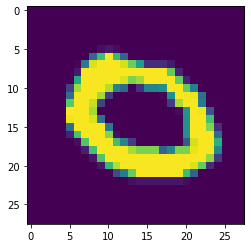

In [21]:
index = np.random.random_integers(0,60000)
plt.imshow(x_train[index])

In [22]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

## Define a plotting function

In [23]:
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)
  plt.legend()


## Create a model

In [24]:
def create_model(my_learning_rate):
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=256, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.4))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).

  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)

  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

Epoch 1/50
12/12 [==============================] - 2s 108ms/step - loss: 1.4545 - accuracy: 0.5464 - val_loss: 0.3767 - val_accuracy: 0.8914
Epoch 2/50
12/12 [==============================] - 1s 96ms/step - loss: 0.4151 - accuracy: 0.8754 - val_loss: 0.2842 - val_accuracy: 0.9183
Epoch 3/50
12/12 [==============================] - 1s 94ms/step - loss: 0.3172 - accuracy: 0.9075 - val_loss: 0.2332 - val_accuracy: 0.9334
Epoch 4/50
12/12 [==============================] - 1s 95ms/step - loss: 0.2487 - accuracy: 0.9280 - val_loss: 0.2035 - val_accuracy: 0.9414
Epoch 5/50
12/12 [==============================] - 1s 94ms/step - loss: 0.2206 - accuracy: 0.9379 - val_loss: 0.1788 - val_accuracy: 0.9495
Epoch 6/50
12/12 [==============================] - 1s 92ms/step - loss: 0.1870 - accuracy: 0.9456 - val_loss: 0.1639 - val_accuracy: 0.9532
Epoch 7/50
12/12 [==============================] - 1s 93ms/step - loss: 0.1719 - accuracy: 0.9497 - val_loss: 0.1489 - val_accuracy: 0.9577
Epoch 8/50
1

[0.06610514223575592, 0.980400025844574]

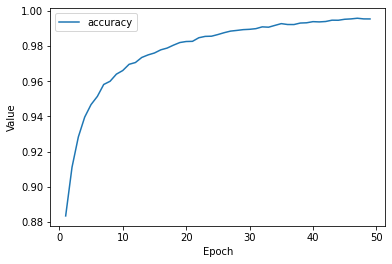

In [26]:
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2


my_model = create_model(learning_rate)

epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)


print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)